# 16: Machine Learning with Scipy
Scipy contains very powerful modules for machine learning, data analysis, time series, etc. This notebook shows you some of the most useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Interpolation
Interpolating a signal is sometimes very useful if you are missing data in a Dataset. But it is a dangerous technique, which can sometimes transform the reality of things!

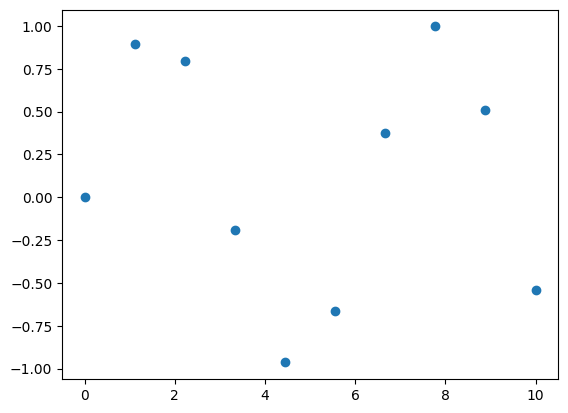

In [2]:
# Dataset Creation
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

In [3]:
from scipy.interpolate import interp1d

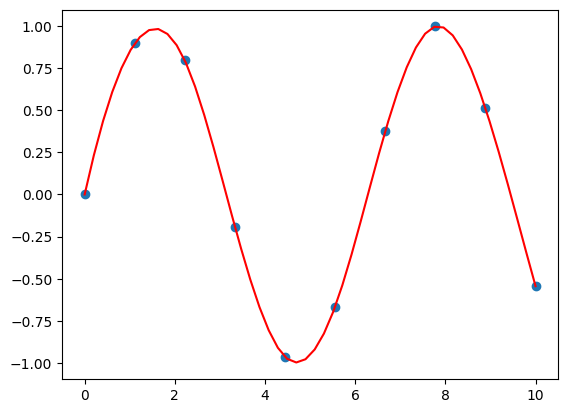

In [4]:
# Creation of the interpolation function f
f = interp1d(x, y, kind='cubic')

# result of the interpolation funciton f on new data
new_x = np.linspace(0, 10, 50)
result = f(new_x)

# visualisation with matplotlib
plt.scatter(x, y)
plt.plot(new_x, result, c='r')

# 2) Optimization
There are many functions in the optimize module. Some make it possible to make local or global minimizations, others allow the development of statistical models with the method of least squares. There are also functions for linear programming.

## curve_fit

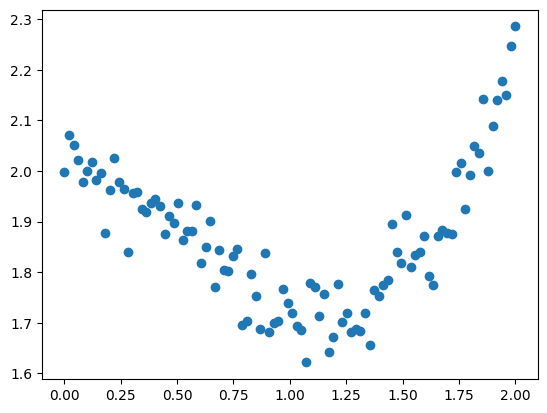

In [5]:
# Dataset creation with du "normal" noise
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [6]:
# Definition of a statistical model 
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [7]:
from scipy import optimize

In [8]:
# curve_fit allows to find the parameters of the model f with the least squares method
params, param_cov = optimize.curve_fit(f, x, y)

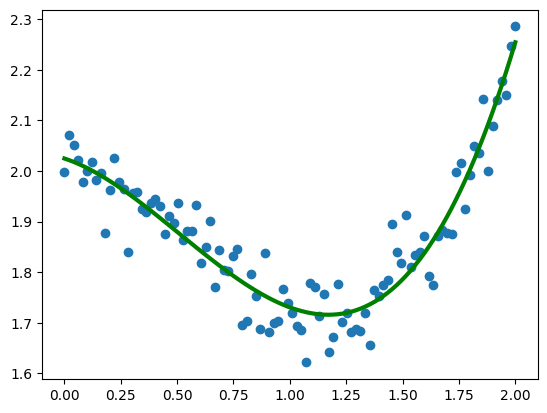

In [9]:
# Result Visualisation
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

## 1D minimization
the optimize.minimize function is useful for finding a local minimum in an N-dimensional function

In [10]:
# Definition of a 1 Dimensional function
def f (x):
    return x**2 + 15*np.sin(x)

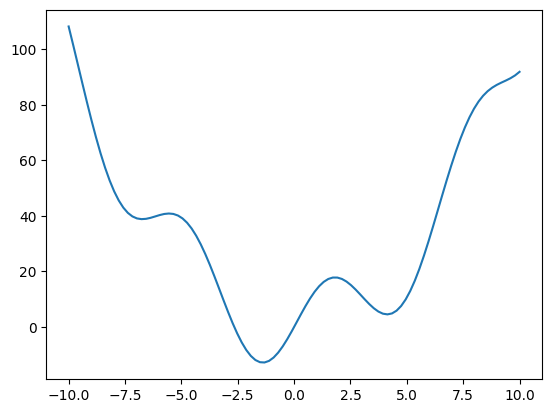

In [11]:
# Visualisation of the fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [12]:
# Definition of a starting point x0 for the minimisation algorithm
x0=-5
result = optimize.minimize(f, x0=x0).x # minimisation result

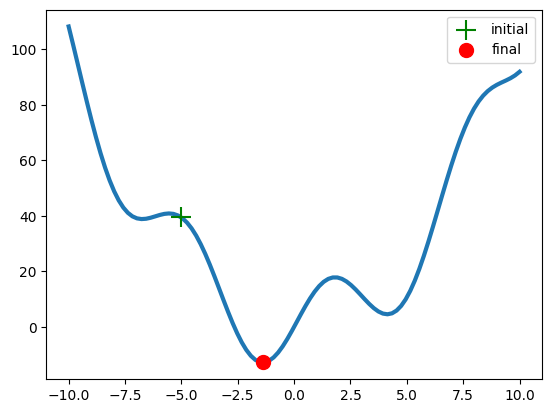

In [13]:
plt.plot(x, f(x), lw=3, zorder=-1) # the function curve
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # initial point 
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # final point
plt.legend()
plt.show()

## Minimisation 2D

In [14]:
# Definition of 2D function. X is a numpy 2-Dimensional ndarray
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

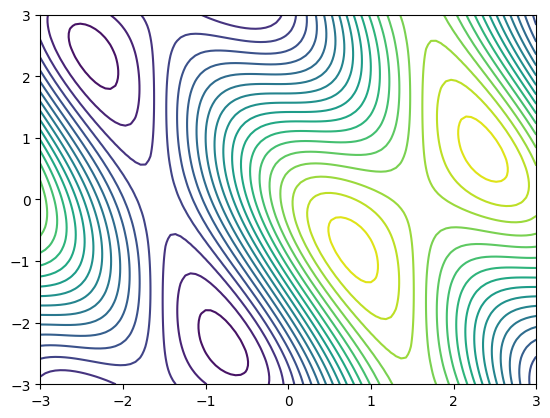

In [15]:
# Generation of the function over a 2D space.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

plt.contour(x, y, f(np.array([x, y])), 20)

/tmp/ipykernel_3873754/2502038826.py:5: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(f, x0=x0).x


The minimum is at coordinates [-0.78539916 -2.35619344]


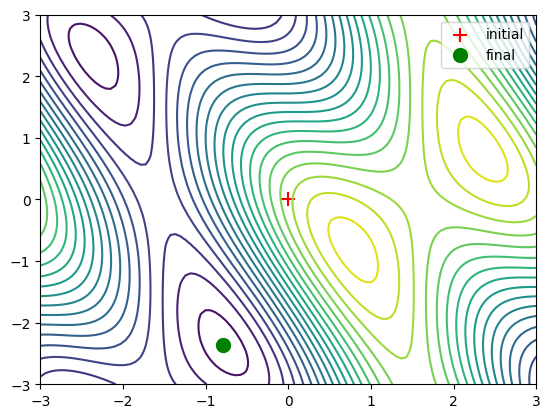

In [16]:
# Setting the initial point x0 at (0,0)
x0 = np.zeros((2, 1))

# Function Minimisation
result = optimize.minimize(f, x0=x0).x
print('The minimum is at coordinates', result) # print the result 

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # 2D function
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # initial point
plt.scatter(result[0], result[1], c='g', s=100, label='final') # final point
plt.legend()
plt.show()

# 3) Signal processing
The scipy.signal module contains a lot of convolution functions and filters for signal processing. The signal.detrend function is perfect for eliminating a linear trend in a signal. Useful for many applications!

The scipy.fftpack module contains very powerful and easy-to-use functions to perform Fourier transforms

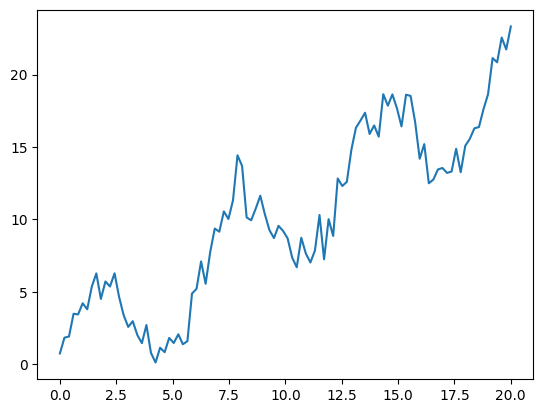

In [17]:
# Dataset Creation with linear drift 
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

In [18]:
from scipy import signal

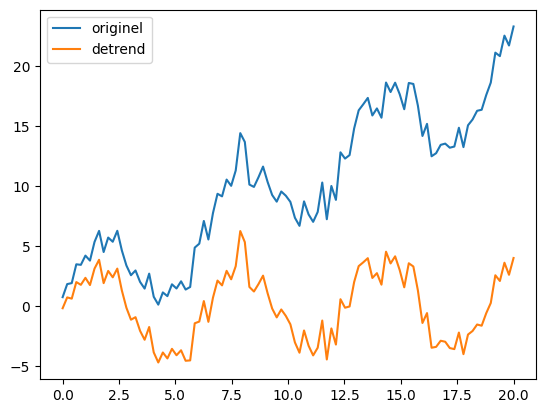

In [19]:
# Elimination of the linear trend
new_y = signal.detrend(y)

# Visualization of results
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()

## Fourier transform (FFT)
The Fourier transform is a powerful mathematical technique and normally complex to implement. Fortunately scipy.fftpack makes this technique very simple to implement

The Fourier transform makes it possible to analyze the frequencies that make up a periodic signal (which repeats over time). This produces a graph called Spectre.

Once the Spectrum is generated, it is possible to filter unwanted noise, or to select only certain frequencies, or to attenuate others... The possibilities are endless.

In the example below, we see how to filter out a signal drowned in noise.

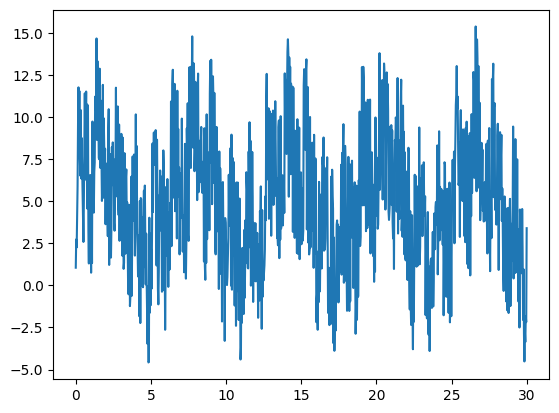

In [20]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

In [21]:
from scipy import fftpack

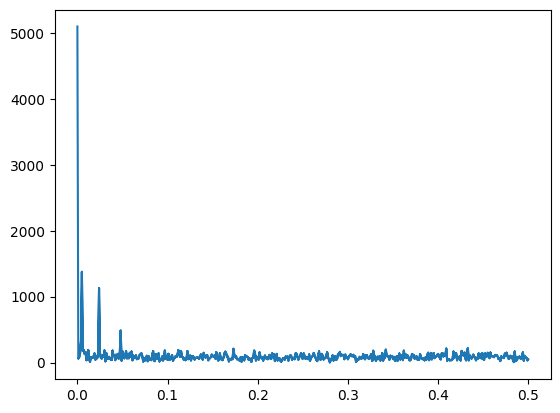

In [22]:
# Creation of a periodic signal embedded in noise.
fourier = fftpack.fft(y)
power = np.abs(fourier) # the power variable is created to eliminate negative amplitudes
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

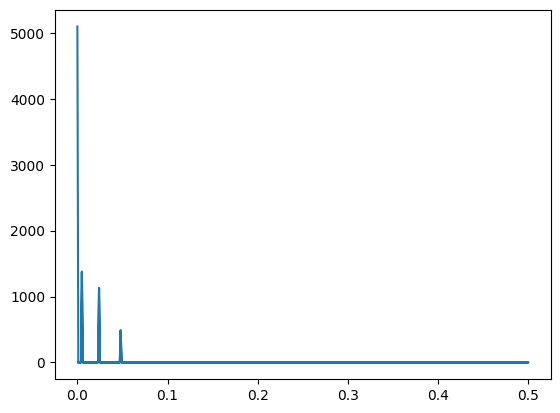

In [23]:
# spectrum filter with Numpy boolean indexing
fourier[power<400] = 0

# Visualization of the clean speter
plt.plot(np.abs(frequences), np.abs(fourier))

In [24]:
# Inverse Fourier Transform: generates a new time signal from the filtered spectrum
filtered_signal = fftpack.ifft(fourier)

/home/ubuntu/Documents/Projects/msci_data/.venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


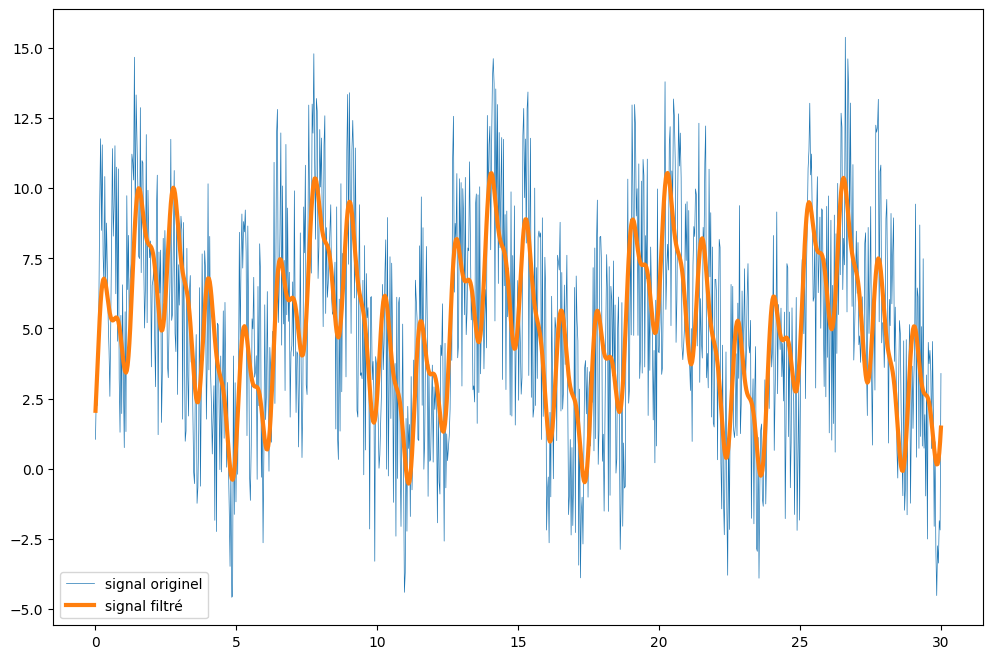

In [25]:
# Viewing the results

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

# 4) Image processing
scipy.ndimage offers many actions for image processing: convolutions, Gaussian filters, measurement method, and morphology.

Morphology is a technique that transforms a matrix (and therefore an image) by moving a structure on each pixel of the image. When a "white" pixel is visited, the structure can perform an operation:

expansion: prints pixels

erosion: erases pixels

This technique can be useful to clean an image of artifacts that can compose it.

In [26]:
from scipy import ndimage

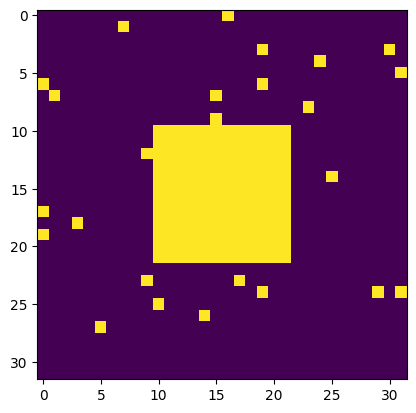

In [27]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(X)

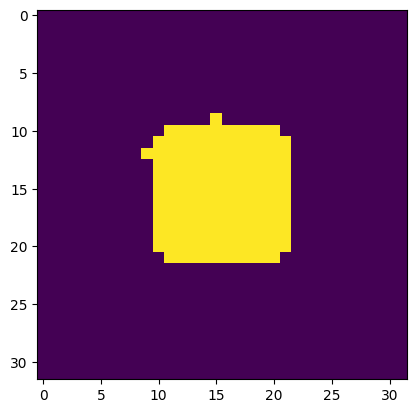

In [28]:
# binary_opening operation = erosion then dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

# 5) Application: Image processing (real case)
You can download this image at:

In [29]:
# import pyplot image
image = plt.imread('../data/bacteria.png')
image = image[:,:,0] # reduce the image to 2D
plt.imshow(image, cmap='gray') # show image
image.shape

FileNotFoundError: [Errno 2] No such file or directory: '../data/bacteria.png'

In [ ]:
# copy the image, then create the histogram
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

In [ ]:
# boolean indexing: creation of the binary image
image= image<0.6
plt.imshow(image)

In [ ]:
# morphologie utilisée pour enlever les artefacts
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

In [ ]:
# image Segmentation: label_image contians the different labels and n_labels is the number of unique labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

In [ ]:
# Visualisation of the image after labelisation 
plt.imshow(label_image)

In [ ]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

In [ ]:
# result viewing
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()